In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [15]:
from keras import models, layers, optimizers

from keras.preprocessing.text import Tokenizer
from tf.keras.preprocessing.sequence import pad_sequences

from sklearn import preprocessing

import pandas as pd
import numpy as np

In [16]:
imdb_df = pd.read_csv('IMDB Dataset.csv')

In [17]:
train_df = imdb_df.sample(frac=0.8, random_state=42)
test_df = imdb_df.drop(train_df.index)

In [18]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_df['review'].to_list())

train_seq = tokenizer.texts_to_sequences(train_df['review'].tolist())
test_seq = tokenizer.texts_to_sequences(test_df['review'].tolist())

max_len = 200
train_data = pad_sequences(train_seq, maxlen=max_len)
test_data = pad_sequences(test_seq, maxlen=max_len)

label_encoder = preprocessing.LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['sentiment'])
test_labels = label_encoder.fit_transform(test_df['sentiment'])

In [19]:
model = models.Sequential([
    tf.keras.layers.Embedding(100000, 64, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 64)           6400000   
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                409632    
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 6,810,177
Trainable params: 6,810,177
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/10
1250/1250 [==============================] - 151s 120ms/step - loss: 0.3490 - accuracy: 0.8359 - val_loss: 0.2755 - val_accuracy: 0.8853
Epoch 2/10
1250/1250 [==============================] - 144s 115ms/step - loss: 0.0976 - accuracy: 0.9655 - val_loss: 0.4115 - val_accuracy: 0.8573
Epoch 3/10
1250/1250 [==============================] - 150s 120ms/step - loss: 0.0231 - accuracy: 0.9918 - val_loss: 0.5509 - val_accuracy: 0.8609
Epoch 4/10
1250/1250 [==============================] - 150s 120ms/step - loss: 0.0146 - accuracy: 0.9953 - val_loss: 0.6424 - val_accuracy: 0.8590
Epoch 5/10
1250/1250 [==============================] - 145s 116ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.6968 - val_accuracy: 0.8574
Epoch 6/10
1250/1250 [==============================] - 150s 120ms/step - loss: 0.0114 - accuracy: 0.9961 - val_loss: 0.7470 - val_accuracy: 0.8562
Epoch 7/10
1250/1250 [==============================] - 146s 117ms/step - loss: 0.0080 - accuracy: 0.9973 - val_

In [22]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Test loss: {test_loss:.2f}, Test accuracy: {test_accuracy:.2%}')

313/313 [==============================] - 1s 4ms/step - loss: 1.0592 - accuracy: 0.8538
Test loss: 1.06, Test accuracy: 85.38%


Text(0.5, 1.0, 'Loss evolution')

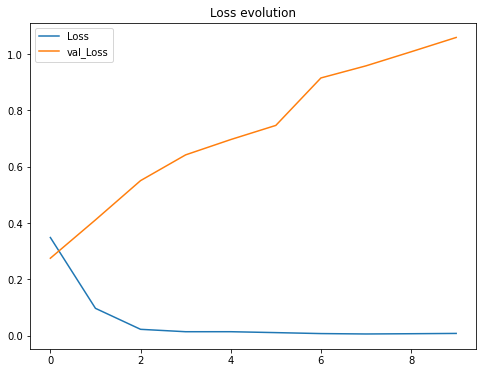

In [23]:
plt.figure(figsize=(8, 6))

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

Text(0.5, 1.0, 'Accuracy evolution')

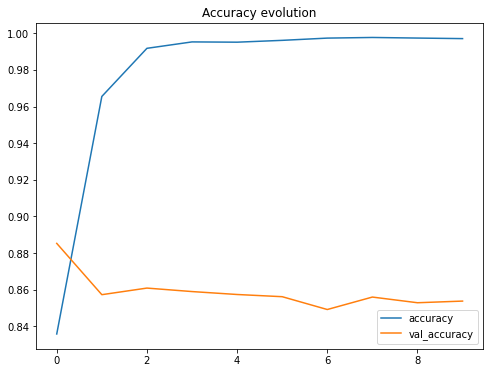

In [24]:
plt.figure(figsize=(8, 6))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [25]:
predictions = model.predict(test_data)

313/313 [==============================] - 1s 3ms/step


In [65]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
reverse_word_map
t = ''
for i in test_data[21]:
    t += reverse_word_map.get(i, '') + ' '
    
print(t)

                                                                                i am so happy and surprised that there is so much interest in this movie jack frost was my introduction into the films produced and distributed by a entertainment and without exception everything this company deals with is pure crap first and this is very important never ever watch this movie sober why would you unlike many other bad movies this one i feel was made intentionally bad i just can't get over how fake the snowman is which is why its always shown only briefly the way it moves is the best this movie is better than the michael keaton piece of crap that was made too be a good movie and that version is as bad as this 


In [64]:
print(predictions[21], test_labels[21])

[0.00012284] 0
